# 7.데이터 정제 - 빠진 데이터, 이상한 데이터 제거하기
1. 결측치 (빠진 데이터)
2. 이상치 (이상한 데이터)

## 7-1. 결측치 (빠진 데이터 찾아 정제)

### Lab 1:결측치 찾기
- 결측치 만들기
- 결측치 확인하기

In [1]:
import numpy as np
import pandas as pd

In [2]:
#결측치가 들어있는 데이터 프레임 만들기
#NaN : Not a Number : 숫자 형태의 누락된 데이터
df = pd.DataFrame({'gender':['M','F',np.nan,'M','F'],
                  'score':[5,4,3,4,np.nan]})
df

,gender,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
#결측치 확인하기
#na : Not Avaiable
pd.isna(df)

,gender,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [4]:
#결측치 개수
pd.isna(df).sum()

gender    1
score     1
dtype: int64

In [5]:
#컬럼(변수) score의 결측치 개수
pd.isna(df)['score'].sum()

1

### Lab 2:결측치 제거
- 결측치 있는 행 제거하기
- 여러 변수에 결측치 없는 데이터 추출하기
- 결측치가 하나라도 있으면 제거하기

In [6]:
#score 변수,gender 변수에서 결측치가 있는 행을 제거
#df에는 반영되지 않는다.
df.dropna(subset = ['score','gender'])

,gender,score
0,M,5.0
1,F,4.0
3,M,4.0


In [7]:
#결측치가 하나라도 있으면 모두 제거하기
df.dropna()

,gender,score
0,M,5.0
1,F,4.0
3,M,4.0


### Lab 3:결측치를 평균 값으로 대체하기
- exam 데이터에서 math의 일부 데이터를 결측치로 대체하기
- exam의 결측치를 math의 평균 값을 구하여 평균값으로 대체하기

In [8]:
exam = pd.read_csv('exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [9]:
#결측치 임의로 만들기
exam.loc[[2,7,14],['math']] = np.nan
exam.head()

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65


In [10]:
#math 평균값 구하기
exam['math'].mean()

55.23529411764706

In [11]:
#결측치 값을 평균값으로 대체하기
exam['math'] = exam['math'].fillna(55)
exam.head()

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65


In [12]:
#결측치 확인
exam['math'].isna().sum()

0

### Lab 4: 혼자서 해보기 (mpg 데이터 분석)
- mpg 데이터에 결측치를 만들고, 데이터를 분석해보기
- 인덱스 값 [64,123,130,152,211]의 고속도로 연비(hwy) 값을 결측치로 만들기

In [13]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [14]:
#인덱스 값[64,123,130,152,211]의 고속도로 연비(hwy) 값을 결측치로 만들기

In [15]:
#인덱스 값 [64, 65]의 데이터를 출력해서 NaN값 확인

Q1: 구동 방식(drv)별로 고속도로 연비(hwy) 평균을 비교하려고 한다.<br>
drv와 hwy 변수에 결측치가 몇개 있는지 확인하기

In [16]:
#변수 drv, hwy 값에 결측치가 몇개인지 확인하기

Q2: df.dropna()를 이용하여 hwy 변수의 결측치를 제거하고, 어떤 구동 방식의 hwy 평균 연비가 높은지 알아보시오. 하나의 pandas 구문으로 작성해 보시오

In [17]:
#변수 hwy 값에 결측치가 몇개인지 확인

In [18]:
#변수 hwy 변수 값에 결측치를 제거하고, 어떤 구동 방식(drv)의 hwy 평균 연비가 높은지

## 7-2.이상치 (이상치 찾아 정제하기)

### Lab 5:이상치 정제하기
- 이상치 : 정상 범위에서 크게 벗어난 값 ex) 몸무게 930kg
1. 이상치를 갖는 데이터 만들기
2. 이상치 확인하기
3. 결측 처리하기
4. 평균 구하기

In [19]:
#이상치를 갖는 데이터 만들기
#gender (남자 = 1, 여자 = 2)
#score (1점~5점) 5점 척도로 분류
#이상치 : gender - 3, score - 6
df = pd.DataFrame({'gender'   : [1, 2, 1, 3, 2, 1], 
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,gender,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [20]:
# 이상치 확인하기
# gender 값의 집단별 빈도수 확인 - 3값이 존재
df['gender'].value_counts().sort_index()

1    3
2    2
3    1
Name: gender, dtype: int64

In [21]:
#이상치 확인하기
# score 값의 집단별 빈도수 확인 - 6값이 존재
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [22]:
#이상 값을 찾아 결측치 부여
df['gender'] = np.where(df['gender']==3,np.nan,df['gender'])
df['score'] = np.where(df['score']==6, np.nan,df['score'])
df

,gender,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [23]:
#결측치를 제외하고 데이터분석
df.dropna(subset=['gender','score']).groupby('gender').agg(mean_score = ('score','mean'))

,mean_score
gender,
1.0,4.0
2.0,3.0


### Lab 6:이상치 제거하기 - 극단적인 값
- 값의 정상범위를 정하고, 정상 범위를 벗어난 값을 제거하기
- 값의 정상 범위를 정할 때 통계적 기준을 적용할 수 있음


1. 상자 그림 살펴보기
- 파란색 상잔느 50%의 데이터의 범주
- 파란색 상자 안의 선은 medium
- 파란색 상자의 맨아래와 맨위는 각각 25% 75%

<Axes: ylabel='hwy'>

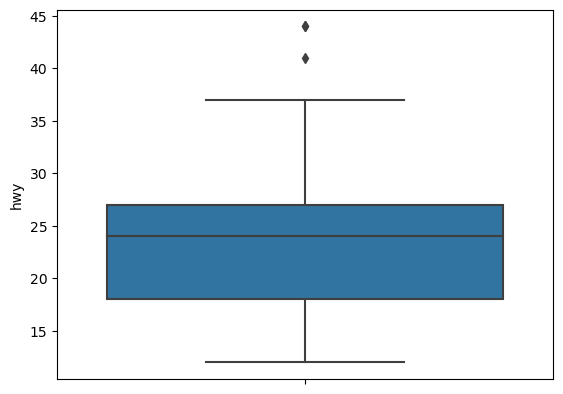

In [24]:
mpg = pd.read_csv('mpg.csv')
import seaborn as sns
sns.boxplot(data = mpg, y='hwy')

2. 극단치 기준값 구하기
- 1사분위수, 3사분위수, IQR, 하한, 상한

In [25]:
#제외하기 전 데이터
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [26]:
# 1사분위수
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [27]:
#3사분위수
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [28]:
#IQR 구하기
iqr = pct75 - pct25
iqr

9.0

In [29]:
#하한 구하기
pct25 - 1.5*iqr

4.5

In [30]:
#상한 구하기
pct75 + 1.5*iqr

40.5

3. 극단치를 결측 처리하기
- hwy 값이 4.5~40.5를 벗어나면 결측치 처리
- (pct25 -1.5iqr) ~ (pct75 + 1.5iqr)

In [31]:
#np.where()의 각 조건을 괄호로 감싸주어야 함
mpg['hwy'] = np.where((mpg['hwy']<4.5)|(mpg['hwy']>40.5),
                     np.nan, mpg['hwy'])
#결측 처리된 값의 수 확인
mpg['hwy'].isna().sum()

3

4. 결측치를 제외하고 데이터 분석
- 구동방식(drv)에 따라 고속도로 연비(hwy)가 어떻게 달라지는지 확인

In [32]:
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


### Lab 7:혼자서 해보기
1. mpg 데이터에서 구동박식(drv)별 도시 연비(cty)를 분석해 봅시다.
2. mpg 데이터에 이상값과 극단값을 할당합니다.
- (drv 이상치 할당)mpg.loc[[9,13,57,92],'drv']='k'
- (cty 이상치 할당)mpg.loc[[28,42,128,202],'cty']=[3.4.39,42]

In [33]:
#drv에는 4(사륜), f(전륜), r(후륜)의 값만 존재함
#k는 허용하지 않는 이상치

In [34]:
#도시 연비 값을 [3.4.39,42]로 할당

Q1: drv에 이상치가 있는지 확인

In [35]:
#k 값이 4개 존재하는 것을 확인

In [36]:
#drv 이상 값 k에 대해 NaN처리

In [37]:
#drv 변수에 이상 값이 몇개인지 확인

In [38]:
#drv에 따른 자동차 빈도 수 구하기

Q2:상자 그림으로 cty에 이상치가 있는지 확인
- (pct25 -1.5 iqr) ~ (pct75 + 1.5 iqr) 범위 밖에 극단 값이 있는지 확인

In [39]:
#도시연비 cty에 이상치가 있는지 확인하기 위해 박스 수염 그래프 그리기


In [40]:
# 25% 값 구하기

In [41]:
# 75% 값 구하기

In [42]:
# iqr 값 구하기

In [43]:
#극단 값인 경우 NaN처리

In [44]:
#도시 연비 cty에 대해 박스 수염 그래프 그리기

Q3:구동방식(drv)별로 도시연비(cty) 평균이 어떻게 다른지 확인하기

In [45]:
#구동방식(drv)과 도시연비(cty)의 이상 값을 제거하고 
#구동방식 별로 도시연비 평균이 어떻게 다른지 확인하기